In [ ]:
# Import libraries
import numpy as np
import matplotlib
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn import tree
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
file_path= input('Input dataset file path here:')

Input dataset file path here:/content/Airline_review.csv


# **STEP 1: RAW DATASET - EXPLORATORY DATA ANALYSIS (EDA)**

In [ ]:

# Import Airline Reviews csv dataset as a dataframe
airline_reviews = pd.read_csv(file_path) # Remember to change path accordingly
airline_reviews.drop('Unnamed: 0', axis=1, inplace=True)

print('airline_reviews shape:')
display(airline_reviews.shape)

print('airline_reviews head:')
display(airline_reviews.head())

print('airline_reviews unique value count:')
display(airline_reviews.nunique())

print('airline_reviews null value count:')
display(airline_reviews.isnull().sum())

print('airline_reviews rows w/ null value count:')
display(airline_reviews.isna().any(axis=1))

print('airline_reviews data types:')
display(airline_reviews.dtypes)

print(f"Class Distribution: {airline_reviews['Recommended'].value_counts()}")

airline_reviews shape:


(23171, 19)

airline_reviews head:


,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,AB Aviation,9,"""pretty decent airline""",11th November 2019,True,Moroni to Moheli. Turned out to be a pretty ...,NaN,Solo Leisure,Economy Class,Moroni to Moheli,November 2019,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes
1,AB Aviation,1,"""Not a good airline""",25th June 2019,True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,Moroni to Anjouan,June 2019,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no
2,AB Aviation,1,"""flight was fortunately short""",25th June 2019,True,Anjouan to Dzaoudzi. A very small airline an...,Embraer E120,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,June 2019,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no
3,Adria Airways,1,"""I will never fly again with Adria""",28th September 2019,False,Please do a favor yourself and do not fly wi...,NaN,Solo Leisure,Economy Class,Frankfurt to Pristina,September 2019,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no
4,Adria Airways,1,"""it ruined our last days of holidays""",24th September 2019,True,Do not book a flight with this airline! My fr...,NaN,Couple Leisure,Economy Class,Sofia to Amsterdam via Ljubljana,September 2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no


airline_reviews unique value count:


,0
Airline Name,497
Overall_Rating,10
Review_Title,17219
Review Date,4557
Verified,2
Review,23046
Aircraft,1048
Type Of Traveller,4
Seat Type,4
Route,13607


airline_reviews null value count:


,0
Airline Name,0
Overall_Rating,0
Review_Title,0
Review Date,0
Verified,0
Review,0
Aircraft,16042
Type Of Traveller,3738
Seat Type,1096
Route,3828


airline_reviews rows w/ null value count:


,0
0,True
1,True
2,True
3,True
4,True
...,...
23166,True
23167,True
23168,True
23169,False


airline_reviews data types:


,0
Airline Name,object
Overall_Rating,object
Review_Title,object
Review Date,object
Verified,bool
Review,object
Aircraft,object
Type Of Traveller,object
Seat Type,object
Route,object


Class Distribution: Recommended
no     15364
yes     7807
Name: count, dtype: int64


In [ ]:
airline_reviews.head()

,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,AB Aviation,9,"""pretty decent airline""",11th November 2019,True,Moroni to Moheli. Turned out to be a pretty ...,NaN,Solo Leisure,Economy Class,Moroni to Moheli,November 2019,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes
1,AB Aviation,1,"""Not a good airline""",25th June 2019,True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,Moroni to Anjouan,June 2019,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no
2,AB Aviation,1,"""flight was fortunately short""",25th June 2019,True,Anjouan to Dzaoudzi. A very small airline an...,Embraer E120,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,June 2019,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no
3,Adria Airways,1,"""I will never fly again with Adria""",28th September 2019,False,Please do a favor yourself and do not fly wi...,NaN,Solo Leisure,Economy Class,Frankfurt to Pristina,September 2019,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no
4,Adria Airways,1,"""it ruined our last days of holidays""",24th September 2019,True,Do not book a flight with this airline! My fr...,NaN,Couple Leisure,Economy Class,Sofia to Amsterdam via Ljubljana,September 2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no


**Key Columns Descriptions:**
*   Airline Name: Name of the airline.
*   Overall_Rating: General rating given to the airline.
*   Review_Title: Title of the review.
*   Review Date: Date the review was posted.
*   Verified: Whether the review is verified.
*   Review: Text of the review.
*   Aircraft: Aircraft type (sparse data).
*   Type Of Traveller: E.g., solo leisure, business.
*   Seat Type: Cabin type (e.g., Economy, Business).
*   Route: Flight route (origin-destination pair).
*   Date Flown: When the flight occurred.
*   Ratings (various aspects, on a scale of 1.0 - 5.0):
  *   Seat Comfort
  *   Cabin Staff Service
  *   Food & Beverages
  *   Ground Service
  *   Inflight Entertainment
  *   Wifi & Connectivity
  *   Value For Money
*   Recommended: Whether the reviewer recommends the airline.


# **MODEL 1.1: RANDOM FOREST BENCHMARK w/ NO PREPROCESSING**

Running the model with no preprocessing at all

Notes:
Just running the model on the raw dataset won't work

Issue 1: could not convert string to float: 'Air Austral'

Explanation:
There are string values in some columns

In [ ]:
# # Import Airline Reviews csv dataset as a dataframe
# airline_reviews_rfbm = pd.read_csv(file_path) # Remember to change path accordingly
# airline_reviews_rfbm.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
# #assign values to the X and y

# X = airline_reviews_rfbm.drop('Recommended', axis=1)
# y = airline_reviews_rfbm['Recommended']

# #split the into random train and test subsets:
# from sklearn.model_selection import train_test_split
# # we use 70-30 train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 9)


In [ ]:
# # run the random forest classifier
# from sklearn.ensemble import RandomForestClassifier
# classifier_RFBM = RandomForestClassifier(n_estimators=10, max_features=10)

# classifier_RFBM.fit(X_train, y_train)
# classifier_RFBM.score(X_test, y_test)

# y_train_pred_RFBM = classifier_RFBM.predict(X_train)
# y_test_pred_RFBM = classifier_RFBM.predict(X_test)

# **MODEL 1.2: RANDOM FOREST BENCHMARK w/ MOST MINIMAL PREPROCESSING**

Running the model with minimal preprocessing.

Notes:

In [ ]:
# # Import Airline Reviews csv dataset as a dataframe
# airline_reviews_rfbm = pd.read_csv(file_path) # Remember to change path accordingly
# airline_reviews_rfbm.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
# #assign values to the X and y

# X = airline_reviews_rfbm.drop('Recommended', axis=1)
# y = airline_reviews_rfbm['Recommended']

# #split the into random train and test subsets:
# from sklearn.model_selection import train_test_split
# # we use 70-30 train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 9)


In [ ]:
# # run the random forest classifier
# from sklearn.ensemble import RandomForestClassifier
# classifier_RFBM = RandomForestClassifier(n_estimators=10, max_features=10)

# classifier_RFBM.fit(X_train, y_train)
# classifier_RFBM.score(X_test, y_test)

# y_train_pred_RFBM = classifier_RFBM.predict(X_train)
# y_test_pred_RFBM = classifier_RFBM.predict(X_test)

# **MODEL 1.9: RANDOM FOREST BENCHMARK w/ MINIMAL PREPROCESSING**

In [ ]:
# Import Airline Reviews csv dataset as a dataframe
airline_reviews_rfbm = pd.read_csv(file_path) # Remember to change path accordingly
airline_reviews_rfbm.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
"""
1. Drop all unnecessary columns
These are columns that are either
  a) invalid in the problem analysis context
  b) contain insights that wouldn't have an influence on the customers' Recommendation
  c) contain string/text-based insights (since we aren't using NLP or text analysis)
  d) time-sensitive (since we aren't using a time-series model)

Since inplace=True we only need to run these once
"""

airline_reviews_rfbm.drop('Airline Name', axis=1, inplace=True)
airline_reviews_rfbm.drop('Overall_Rating', axis=1, inplace=True)
airline_reviews_rfbm.drop('Review_Title', axis=1, inplace=True)
airline_reviews_rfbm.drop('Review Date', axis=1, inplace=True)
airline_reviews_rfbm.drop('Review', axis=1, inplace=True)
airline_reviews_rfbm.drop('Aircraft', axis=1, inplace=True)
airline_reviews_rfbm.drop('Route', axis=1, inplace=True)
airline_reviews_rfbm.drop('Date Flown', axis=1, inplace=True)
# airline_reviews_rfbm.drop('Verified', axis = 1, inplace = True)

In [ ]:
# """
# 2. Transform null values if applicable
# Many reviews will have null values in rating columns where the reviewer may
# have just felt neutral (e.g. Wifi & Connectivity, Inflight Entertainment, etc)

# If there is a null rating, just set it to "3.0")
# """

# airline_reviews_rfbm['Seat Comfort'].fillna(3.0, inplace=True)
# airline_reviews_rfbm['Cabin Staff Service'].fillna(3.0, inplace=True)
# airline_reviews_rfbm['Food & Beverages'].fillna(3.0, inplace=True)
# airline_reviews_rfbm['Ground Service'].fillna(3.0, inplace=True)
# airline_reviews_rfbm['Inflight Entertainment'].fillna(3.0, inplace=True)
# airline_reviews_rfbm['Wifi & Connectivity'].fillna(3.0, inplace=True)

In [ ]:
# """
# 3. Drop all rows with null values
# """

# airline_reviews_rfbm.dropna(inplace=True)
# airline_reviews_rfbm.reset_index(inplace=True)

In [ ]:
"""
Transform the values in 'Type Of Traveller' column as:
'Solo Leisure': 0
'Couple Leisure': 1
'Business': 2
'Family Leisure': 3

Transform the values in 'Seat Type' column as:
'Economy Class': 0
'Business Class': 1
'Premium Economy': 2
'First Class': 3

"""

airline_reviews_rfbm['Type Of Traveller'] = airline_reviews_rfbm['Type Of Traveller'].map({
    'Solo Leisure': 0.0,
    'Couple Leisure': 1.0,
    'Business': 2.0,
    'Family Leisure': 3.0
})

airline_reviews_rfbm['Seat Type'] = airline_reviews_rfbm['Seat Type'].map({
    'Economy Class': 0.0,
    'Business Class': 1.0,
    'Premium Economy': 2.0,
    'First Class': 3.0
})

In [ ]:
"""
5. Transform values in Recommended column as yes = 1 and no = 0

Setting these to binary values will make training our model easier.
"""

airline_reviews_rfbm['Recommended'] = airline_reviews_rfbm['Recommended'].map({'yes': 1, 'no': 0})

In [ ]:
"""
Evaluating post-processed dataset.
"""
# airline_reviews_rfbm.drop('index', axis=1, inplace=True)
airline_reviews_rfbm.reset_index()

print('airline_reviews shape:')
display(airline_reviews_rfbm.shape)

print('airline_reviews head:')
display(airline_reviews_rfbm.head())

print('airline_reviews unique value count:')
display(airline_reviews_rfbm.nunique())

print('airline_reviews null value count:')
display(airline_reviews_rfbm.isnull().sum())

print('airline_reviews rows w/ null value count:')
display(airline_reviews_rfbm.isna().any(axis=1))

print('airline_reviews data types:')
display(airline_reviews_rfbm.dtypes)

print(f"Class Distribution: {airline_reviews_rfbm['Recommended'].value_counts() / len(airline_reviews_rfbm['Recommended'])}")

airline_reviews shape:


(23171, 11)

airline_reviews head:


,Verified,Type Of Traveller,Seat Type,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,True,0.0,0.0,4.0,5.0,4.0,4.0,NaN,NaN,3.0,1
1,True,0.0,0.0,2.0,2.0,1.0,1.0,NaN,NaN,2.0,0
2,True,0.0,0.0,2.0,1.0,1.0,1.0,NaN,NaN,2.0,0
3,False,0.0,0.0,1.0,1.0,NaN,1.0,NaN,NaN,1.0,0
4,True,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0


airline_reviews unique value count:


,0
Verified,2
Type Of Traveller,4
Seat Type,4
Seat Comfort,6
Cabin Staff Service,6
Food & Beverages,6
Ground Service,5
Inflight Entertainment,6
Wifi & Connectivity,6
Value For Money,6


airline_reviews null value count:


,0
Verified,0
Type Of Traveller,3738
Seat Type,1096
Seat Comfort,4155
Cabin Staff Service,4260
Food & Beverages,8671
Ground Service,4793
Inflight Entertainment,12342
Wifi & Connectivity,17251
Value For Money,1066


airline_reviews rows w/ null value count:


,0
0,True
1,True
2,True
3,True
4,False
...,...
23166,True
23167,True
23168,True
23169,False


airline_reviews data types:


,0
Verified,bool
Type Of Traveller,float64
Seat Type,float64
Seat Comfort,float64
Cabin Staff Service,float64
Food & Beverages,float64
Ground Service,float64
Inflight Entertainment,float64
Wifi & Connectivity,float64
Value For Money,float64


Class Distribution: Recommended
0    0.66307
1    0.33693
Name: count, dtype: float64


In [ ]:
#assign values to the X and y

X = airline_reviews_rfbm.drop('Recommended', axis=1)
y = airline_reviews_rfbm['Recommended']

#split the into random train and test subsets:
from sklearn.model_selection import train_test_split
# we use 70-30 train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 9)


In [ ]:
"""
Random Forest Classifier
"""
from sklearn.ensemble import RandomForestClassifier
classifier_RFBM = RandomForestClassifier(n_estimators=10, max_features=10)

# Fit the model
classifier_RFBM.fit(X_train, y_train)

y_train_pred_RFBM = classifier_RFBM.predict(X_train)
y_test_pred_RFBM = classifier_RFBM.predict(X_test)

In [ ]:
"""
Evaluating the Model
"""

accuracy = accuracy_score(y_test_pred_RFBM, y_test)
f1 = f1_score(y_test_pred_RFBM, y_test, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)

# Stratified Accuracy
stratified_cv = StratifiedKFold(n_splits= 10, shuffle= True, random_state= 42)

stratified_scores = cross_val_score(classifier_RFBM, X_train, y_train, cv=stratified_cv, scoring='accuracy')

print('Cross-validated Stratified Score (Accuracy):', np.mean(stratified_scores))

Accuracy: 0.9371403912543153
F1 Score: 0.9371823515036491
Cross-validated Stratified Score (Accuracy): 0.9432149781954022


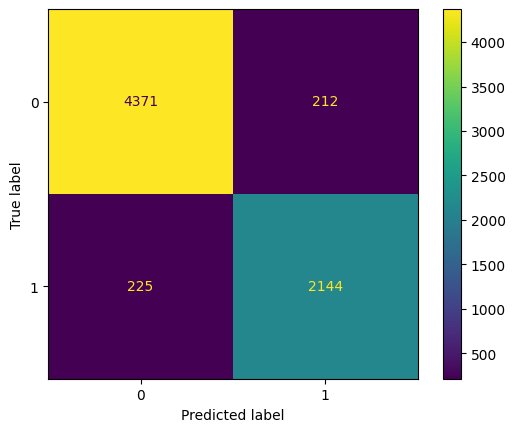

In [ ]:
# Confusion Matrix for Benchmark Model
labels = [0,1]
cm = confusion_matrix(y_test, y_test_pred_RFBM, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

# **MODEL 2: RANDOM FOREST W/ PREPROCESSING**

In [ ]:
# Import Airline Reviews csv dataset as a dataframe
airline_reviews_rf = pd.read_csv(file_path) # Remember to change path accordingly
airline_reviews_rf.drop('Unnamed: 0', axis=1, inplace=True)

display(airline_reviews_rf.shape)

(23171, 19)

In [ ]:
"""
1. Drop all unnecessary columns
These are columns that are either
  a) invalid in the problem analysis context
  b) contain insights that wouldn't have an influence on the customers' Recommendation
  c) contain string/text-based insights (since we aren't using NLP or text analysis)
  d) time-sensitive (since we aren't using a time-series model)

Since inplace=True we only need to run these once
"""

airline_reviews_rf.drop('Airline Name', axis=1, inplace=True)
airline_reviews_rf.drop('Overall_Rating', axis=1, inplace=True)
airline_reviews_rf.drop('Review_Title', axis=1, inplace=True)
airline_reviews_rf.drop('Review Date', axis=1, inplace=True)
airline_reviews_rf.drop('Review', axis=1, inplace=True)
airline_reviews_rf.drop('Aircraft', axis=1, inplace=True)
airline_reviews_rf.drop('Route', axis=1, inplace=True)
airline_reviews_rf.drop('Date Flown', axis=1, inplace=True)

#airline_reviews_rf.drop('Value For Money', axis=1, inplace=True)


display(airline_reviews_rf.shape)

(23171, 11)

In [ ]:
"""
2. Drop all reviews that are not Verified
"""

airline_reviews_rf = airline_reviews_rf[airline_reviews_rf['Verified'] == True]
airline_reviews_rf.drop('Verified', axis=1, inplace=True) # Drop the column after subsetting

display(airline_reviews_rf.shape)

(12322, 10)

In [ ]:
"""
3. Transform null values if applicable
Many reviews will have null values in rating columns where the reviewer may
have just felt neutral (e.g. Wifi & Connectivity, Inflight Entertainment, etc)

If there is a null rating, just set it to "3.0")
"""

airline_reviews_rf['Seat Comfort'].fillna(3.0, inplace=True)
airline_reviews_rf['Cabin Staff Service'].fillna(3.0, inplace=True)
airline_reviews_rf['Food & Beverages'].fillna(3.0, inplace=True)
airline_reviews_rf['Ground Service'].fillna(3.0, inplace=True)
airline_reviews_rf['Inflight Entertainment'].fillna(3.0, inplace=True)
airline_reviews_rf['Wifi & Connectivity'].fillna(3.0, inplace=True)

display(airline_reviews_rf.shape)

<ipython-input-40-c2b8dd5a6edc>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  airline_reviews_rf['Seat Comfort'].fillna(3.0, inplace=True)
<ipython-input-40-c2b8dd5a6edc>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

(12322, 10)

In [ ]:
"""
4. Drop all rows with null values
"""

airline_reviews_rf.dropna(inplace=True)
airline_reviews_rf.reset_index(inplace=True)

display(airline_reviews_rf.shape)

(12320, 11)

In [ ]:
"""
5. Transform values in Recommended column as yes = 1 and no = 0

Setting these to binary values will make training our model easier.
"""

airline_reviews_rf['Recommended'] = airline_reviews_rf['Recommended'].map({'yes': 1, 'no': 0})

In [ ]:
"""
Transform the values in 'Type Of Traveller' column as:
'Solo Leisure': 0
'Couple Leisure': 1
'Business': 2
'Family Leisure': 3

Transform the values in 'Seat Type' column as:
'Economy Class': 0
'Business Class': 1
'Premium Economy': 2
'First Class': 3

"""

airline_reviews_rf['Type Of Traveller'] = airline_reviews_rf['Type Of Traveller'].map({
    'Solo Leisure': 0.0,
    'Couple Leisure': 1.0,
    'Business': 2.0,
    'Family Leisure': 3.0
})

airline_reviews_rf['Seat Type'] = airline_reviews_rf['Seat Type'].map({
    'Economy Class': 0.0,
    'Business Class': 1.0,
    'Premium Economy': 2.0,
    'First Class': 3.0
})

In [ ]:
"""
Evaluating post-processed dataset.
"""
airline_reviews_rf.drop('index', axis=1, inplace=True)
airline_reviews_rf.reset_index()

print('airline_reviews shape:')
display(airline_reviews_rf.shape)

print('airline_reviews head:')
display(airline_reviews_rf.head())

print('airline_reviews unique value count:')
display(airline_reviews_rf.nunique())

print('airline_reviews null value count:')
display(airline_reviews_rf.isnull().sum())

print('airline_reviews rows w/ null value count:')
display(airline_reviews_rf.isna().any(axis=1))

print('airline_reviews data types:')
display(airline_reviews_rf.dtypes)

print(f"Class Distribution: {airline_reviews_rf['Recommended'].value_counts() / len(airline_reviews_rf['Recommended'])}")

airline_reviews shape:


(12320, 10)

airline_reviews head:


,Type Of Traveller,Seat Type,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,0.0,0.0,4.0,5.0,4.0,4.0,3.0,3.0,3.0,1
1,0.0,0.0,2.0,2.0,1.0,1.0,3.0,3.0,2.0,0
2,0.0,0.0,2.0,1.0,1.0,1.0,3.0,3.0,2.0,0
3,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
4,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0


airline_reviews unique value count:


,0
Type Of Traveller,4
Seat Type,4
Seat Comfort,5
Cabin Staff Service,5
Food & Beverages,5
Ground Service,5
Inflight Entertainment,5
Wifi & Connectivity,5
Value For Money,5
Recommended,2


airline_reviews null value count:


,0
Type Of Traveller,0
Seat Type,0
Seat Comfort,0
Cabin Staff Service,0
Food & Beverages,0
Ground Service,0
Inflight Entertainment,0
Wifi & Connectivity,0
Value For Money,0
Recommended,0


airline_reviews rows w/ null value count:


,0
0,False
1,False
2,False
3,False
4,False
...,...
12315,False
12316,False
12317,False
12318,False


airline_reviews data types:


,0
Type Of Traveller,float64
Seat Type,float64
Seat Comfort,float64
Cabin Staff Service,float64
Food & Beverages,float64
Ground Service,float64
Inflight Entertainment,float64
Wifi & Connectivity,float64
Value For Money,float64
Recommended,int64


Class Distribution: Recommended
0    0.695536
1    0.304464
Name: count, dtype: float64


In [ ]:
# Assign values to X and y
X2 = airline_reviews_rf.drop('Recommended', axis=1)
y2 = airline_reviews_rf['Recommended']

# Apply SMOTE only to the training set
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=0.7, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X2, y2)

# Seeing resampled class distribution after SMOTE
resampled_class_counts = y_train_resampled.value_counts() / len(y_train_resampled)
print(f"Class Distribution: {resampled_class_counts}")

# Split the data into 70% training and 30% testing sets
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train_resampled, y_train_resampled, test_size=0.3, random_state=42)

# Run the random forest classifier
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators=10, max_features=10)

# Train on the resampled training set
classifier_RF.fit(X_train_resampled, y_train_resampled)

y_pred_RF = classifier_RF.predict(X_test2)


Class Distribution: Recommended
0    0.588247
1    0.411753
Name: count, dtype: float64


In [ ]:
"""
Evaluating the Model
"""

accuracy = accuracy_score(y_pred_RF, y_test2)
f1 = f1_score(y_pred_RF, y_test2, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)

# Stratified Accuracy
stratified_cv = StratifiedKFold(n_splits= 10, shuffle= True, random_state= 42)

stratified_scores = cross_val_score(classifier_RF, X_train_resampled, y_train_resampled, cv=stratified_cv, scoring='accuracy')

print('Cross-validated Stratified Score (Accuracy):', np.mean(stratified_scores))

Accuracy: 0.9860443834362846
F1 Score: 0.9860515536518073
Cross-validated Stratified Score (Accuracy): 0.9498863010702406


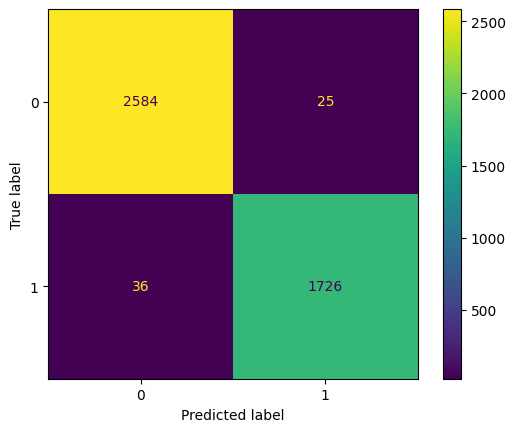

In [ ]:
labels = [0,1]
cm = confusion_matrix(y_test2, y_pred_RF, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

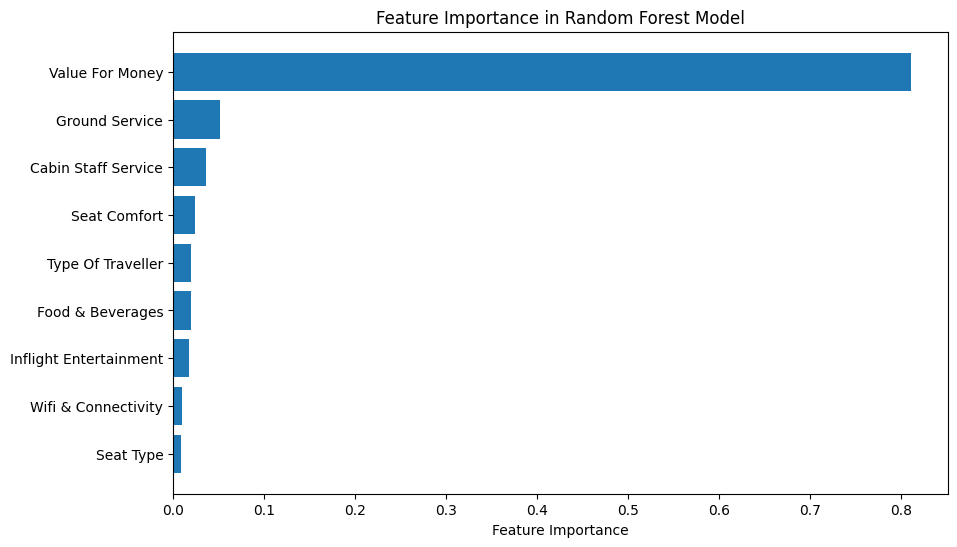

In [ ]:
# plotting feature importance
# Get the feature importances from the Random Forest model
importances = classifier_RF.feature_importances_

importance_df = pd.DataFrame({
    'Feature': airline_reviews_rf.columns[:-1],  # Exclude the target column
    'Importance': importances
})

# Sort by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

#Plot the feature importances

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest Model')
plt.gca().invert_yaxis()  # Invert y-axis to show most important features at the top
plt.show()

In [ ]:
display(importance_df)

,Feature,Importance
8,Value For Money,0.810975
5,Ground Service,0.051429
3,Cabin Staff Service,0.036637
2,Seat Comfort,0.023781
0,Type Of Traveller,0.020202
4,Food & Beverages,0.019939
6,Inflight Entertainment,0.017606
7,Wifi & Connectivity,0.010206
1,Seat Type,0.009225
